In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Import Necessary Libraries**

In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt


**Task #1: Merge the 12 months sales data inta a single CSV file**

In [ ]:
### read any one file from Sales_data
df = pd.read_csv("/content/drive/MyDrive/Sales_Data/Sales_April_2019.csv")
df.head()

In [ ]:
### merging the 12 months sales data into sinle one, called "all_months_data"
files = [file for file in os.listdir('/content/drive/MyDrive/Sales_Data/')]

all_data = pd.DataFrame()

for file in files:
  df = pd.read_csv('/content/drive/MyDrive/Sales_Data/'+file)
  all_data = pd.concat([all_data,df])

all_data.head()

In [ ]:
all_data.shape

In [ ]:
all_data.tail()

**Clean up the data!**

Drop the NaN

In [ ]:
# To chech whether NaN is available in Order Date or not
all_data['Order Date'].isnull().values.any()

In [ ]:
#If above answer is True, Count the NaN values
all_data['Order Date'].isnull().sum()

In [ ]:
# To chech whether NaN is available in all columns or not
NaN_df = all_data[all_data.isna().any(axis=1)]
NaN_df.head()


In [ ]:
# Drop rows of NaN 

all_data = all_data.dropna(how='all')
all_data.head()

Find 'Or' and delete it

In [ ]:
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_df.head()

In [ ]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data

Convert columns to the correct type

In [ ]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])  # make integer
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])  #make float

all_data.head()

**Augment data with additional columns**

In [ ]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

**Task 2: Add a city column**

In [ ]:
temp = all_data['Purchase Address'].str.split(",", expand = True)
temp.head()

In [ ]:
city = temp[1]
city.head()

In [ ]:
state=temp[2].str.split(' ',expand=True)[1]
state.head()

In [ ]:
all_data['City']=city
all_data['State']=state
all_data.head()

**Question 1:What was the best month for sales? How much was earned that month ?** 

In [ ]:
all_data.dtypes

In [ ]:
# Add a sales column
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.tail()

In [ ]:
results = all_data.groupby('Month').sum().astype('int64')

results.head(12)

In [ ]:
months = range(1,13)

plt.bar(months, results['Sales'])
plt.xlabel("Month's Number")
plt.ylabel("Sales in USD ($)")

plt.show()

**Question 2: Which  city had the highest number of sales?**

In [ ]:
sales_per_city=all_data[['City','State','Sales']].groupby(['State','City']).sum().astype('int64')
sales_per_city.head(100)

In [ ]:
ax=sales_per_city.plot(figsize=(15,5),kind='bar',legend=False,ylabel='Sales in USD',title='city sold the most Product')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() , p.get_height()*1.02 ))

**Question 3: What time should we display advertisements to maximize likelihood of customer's buying product ?**

In [ ]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.head()

In [ ]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()


In [ ]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

## best time  for advertisments is around 11am or 7pm.

**Question 4: What products are most often sold together ?**

In [ ]:
df = all_data[all_data['Order ID'].duplicated(keep = False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head(100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Order ID,Grouped
17,209938,"iPhone,Wired Headphones"
29,209949,"Google Phone,USB-C Charging Cable"
41,209960,"USB-C Charging Cable,AA Batteries (4-pack)"
43,209961,"iPhone,Lightning Charging Cable"
147,210064,"Lightning Charging Cable,27in FHD Monitor"
...,...,...
2156,211965,"Wired Headphones,USB-C Charging Cable"
2162,211970,"Google Phone,USB-C Charging Cable"
2185,211992,"iPhone,Lightning Charging Cable"
2255,212061,"USB-C Charging Cable,Wired Headphones"


In [ ]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list, 2)))   # most sold two product together

for key, value in count.most_common(10):
  print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


**Qustion 5: What product sold the most ? Why do you think it sold the most ?**

In [ ]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,State,Sales,Hour,Minute
0,209921,USB-C Charging Cable,1,11.95,2019-06-23 19:34:00,"950 Walnut St, Portland, ME 04101",6,Portland,ME,11.95,19,34
1,209922,Macbook Pro Laptop,1,1700.00,2019-06-30 10:05:00,"80 4th St, San Francisco, CA 94016",6,San Francisco,CA,1700.00,10,5
2,209923,ThinkPad Laptop,1,999.99,2019-06-24 20:18:00,"402 Jackson St, Los Angeles, CA 90001",6,Los Angeles,CA,999.99,20,18
3,209924,27in FHD Monitor,1,149.99,2019-06-05 10:21:00,"560 10th St, Seattle, WA 98101",6,Seattle,WA,149.99,10,21
4,209925,Bose SoundSport Headphones,1,99.99,2019-06-25 18:58:00,"545 2nd St, San Francisco, CA 94016",6,San Francisco,CA,99.99,18,58


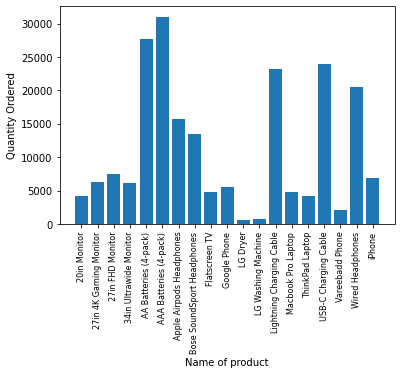

In [ ]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Name of product')
plt.xticks(products, rotation = 'vertical', size = 8)
plt.show()

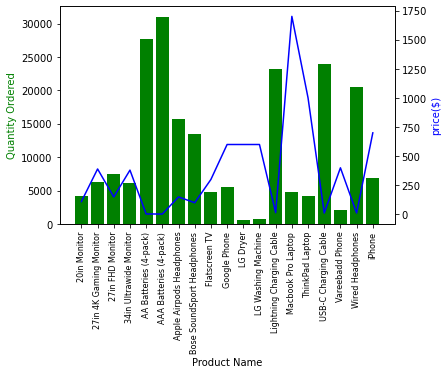

In [ ]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color = 'g')
ax2.set_ylabel('price($)', color = 'b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()
